In [1]:
import seaborn as sns
import pandas as pd
import os, re, json, numpy as np
import datetime
from tqdm import tqdm
import missingno as mso
import matplotlib.pyplot as plt
import matplotlib
from itertools import chain
from collections import Iterable
from matplotlib import colors as cls
import matplotlib.patches as patches
import math
%matplotlib inline

def set_time(data, kind):

    gb_day=data.groupby(['{}_day'.format(kind),'{}_hour'.format(kind)]).size()

    hari=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
    jam=range(24)

    result = np.zeros((7,24),dtype=int)
    for i in range(7):
        for j in jam:
#             if int(j)<10:
#                 v = '0{}'.format(j)
            result[i,j]=gb_day[hari[i],j]
    return result
def created_time_heatmap(brand_name, data, colors, kind = 'created_at'):
#     data = data[data.targe_name==brand_name].reset_index(drop=True)
    plt.figure(figsize=(13,10))
    hari=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
    jam=list(range(24))
    ax = sns.heatmap(pd.DataFrame(set_time(data,kind),index=hari),cmap=colors, linewidths=.5, 
                     cbar_kws={"shrink": .35, "pad":.01}, square=True,cbar=True)
    labels = []
    for i in jam:
        if i>=10:
            if i==12:
                labels.append(str(i)+"pm")
            elif i>12:
                labels.append(str(i-12)+"pm")
            else:
                labels.append(str(i)+"am")
        else:
            if i==0:
                labels.append('12am')
            else:
                labels.append(str(i)+"am")

    ax.set_xticklabels(labels,rotation=30)
    ax.set_title("%s\n"% brand_name.title(), size=16)

    plt.show()

C:\Users\955498\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  # Remove the CWD from sys.path while we load stuff.


# habits

In [2]:
payment = pd.read_csv('../payment_promo.csv')

In [3]:
payment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3750623 entries, 0 to 3750622
Data columns (total 34 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   promo_id               float64
 1   promo_type             float64
 2   promo_campaign         float64
 3   amount                 float64
 4   trx_id                 int64  
 5   buyer_id               int64  
 6   seller_id              int64  
 7   created_at             object 
 8   paid_at                object 
 9   remitted_at            object 
 10  refunded_at            object 
 11  gmv                    float64
 12  courier_cost           float64
 13  payment_method         int64  
 14  platform               int64  
 15  courier                int64  
 16  from_city              int64  
 17  weight                 float64
 18  created_day            object 
 19  created_hour           int64  
 20  paid_day               object 
 21  paid_hour              int64  
 22  remitted_day      

In [4]:
payment.describe()

,promo_id,promo_type,promo_campaign,amount,trx_id,buyer_id,seller_id,refunded_at,gmv,courier_cost,...,from_city,weight,created_hour,paid_hour,remitted_hour,refunded_hour,promo,refunded,spend_time_buying,spend_time_remitted
count,1.388494e+06,1.388494e+06,1.388494e+06,1.388494e+06,3.750623e+06,3.750623e+06,3.750623e+06,2.238310e+05,3.750623e+06,3.750623e+06,...,3.750623e+06,3.750623e+06,3.750623e+06,3.750623e+06,3.530322e+06,223831.0,3.750623e+06,3.750623e+06,3.750623e+06,3.530322e+06
mean,4.571321e+07,6.196728e-01,1.568420e+02,-1.839564e+00,2.892057e+08,3.490022e+07,2.283092e+07,1.391818e+12,-4.200741e-01,-2.738128e+00,...,1.762261e+02,5.738602e-05,8.388641e+00,8.424744e+00,8.971800e+00,7.0,3.702036e-01,5.967835e-02,1.313708e+00,8.411236e+01
std,2.681341e+06,4.854674e-01,7.016157e+01,4.261090e-01,1.692760e+07,2.400249e+07,2.030268e+07,9.697129e+08,1.180925e+00,1.851257e+00,...,1.189151e+02,1.375245e+00,5.824266e+00,5.507957e+00,4.759683e+00,0.0,4.828591e-01,2.368900e-01,4.130791e+00,9.566152e+01
min,4.127356e+07,0.000000e+00,0.000000e+00,-2.936000e+00,1.243756e+08,-1.000000e+00,-1.000000e+00,1.388953e+12,-7.540000e+00,-1.382000e+01,...,0.000000e+00,-5.290000e+00,0.000000e+00,0.000000e+00,0.000000e+00,7.0,0.000000e+00,0.000000e+00,-1.666667e-03,6.666667e-03
25%,4.343091e+07,0.000000e+00,1.010000e+02,-1.836000e+00,2.745664e+08,1.169085e+07,5.654785e+06,1.391150e+12,-1.062500e+00,-3.040000e+00,...,1.310000e+02,-8.027000e-01,4.000000e+00,4.000000e+00,5.000000e+00,7.0,0.000000e+00,0.000000e+00,1.500000e-02,4.665229e+01
50%,4.555588e+07,1.000000e+00,1.410000e+02,-1.836000e+00,2.873332e+08,3.358838e+07,1.653162e+07,1.391823e+12,-5.366000e-01,-2.598000e+00,...,1.330000e+02,1.098000e-01,7.000000e+00,8.000000e+00,9.000000e+00,7.0,0.000000e+00,0.000000e+00,1.191667e-01,7.447917e+01
75%,4.786114e+07,1.000000e+00,2.290000e+02,-1.836000e+00,3.030016e+08,5.990769e+07,3.913526e+07,1.392486e+12,1.098600e-01,-2.059000e+00,...,1.950000e+02,8.020000e-01,1.200000e+01,1.200000e+01,1.200000e+01,7.0,1.000000e+00,0.000000e+00,1.020278e+00,1.086703e+02
max,5.086186e+07,1.000000e+00,2.480000e+02,9.775000e-01,3.225270e+08,7.102254e+07,7.098985e+07,1.425703e+12,7.727000e+00,4.105000e+00,...,4.380000e+02,1.129000e+01,2.300000e+01,2.300000e+01,2.300000e+01,7.0,1.000000e+00,1.000000e+00,3.312407e+03,1.272391e+04


In [4]:
payment = payment.astype({"trx_id":np.int32,'buyer_id':np.int32,
                          'seller_id':np.int32,'from_city':np.int16,
                          'promo':np.int8,'refunded':np.int8,'created_hour':np.int8,
                          'created_hour':np.int8,'paid_hour':np.int8,'platform':np.int16,
                          'courier':np.int16,'from_city':np.int16})

In [5]:
payment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3750623 entries, 0 to 3750622
Data columns (total 34 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   promo_id               float64
 1   promo_type             float64
 2   promo_campaign         float64
 3   amount                 float64
 4   trx_id                 int32  
 5   buyer_id               int32  
 6   seller_id              int32  
 7   created_at             object 
 8   paid_at                object 
 9   remitted_at            object 
 10  refunded_at            object 
 11  gmv                    float64
 12  courier_cost           float64
 13  payment_method         int64  
 14  platform               int16  
 15  courier                int16  
 16  from_city              int16  
 17  weight                 float64
 18  created_day            object 
 19  created_hour           int8   
 20  paid_day               object 
 21  paid_hour              int8   
 22  remitted_day      

In [6]:
payment['promo'] = np.where(pd.isna(payment['promo_id']),0,1)
payment['refunded'] = np.where(pd.isna(payment['refunded_at']),0,1)

habits_payment = payment[['promo_type', 'promo_campaign', 'amount', 
       'buyer_id', 'seller_id', 'gmv', 'courier_cost', 'payment_method', 'platform',
       'courier','weight','gap_created_paid',
       'gap_paid_remitted', 'gap_remitted_refunded', 'gap_paid_refunded',
       'promo', 'refunded','created_day', 'created_hour',
       'paid_day', 'paid_hour', 'remitted_day', 'remitted_hour',
       'refunded_day', 'refunded_hour','spend_time_remitted','spend_time_buying']]

In [14]:
habits_payment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3750623 entries, 0 to 3750622
Data columns (total 27 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   promo_type             float64
 1   promo_campaign         float64
 2   amount                 float64
 3   buyer_id               int32  
 4   seller_id              int32  
 5   gmv                    float64
 6   courier_cost           float64
 7   payment_method         int64  
 8   platform               int16  
 9   courier                int16  
 10  weight                 float64
 11  gap_created_paid       object 
 12  gap_paid_remitted      object 
 13  gap_remitted_refunded  object 
 14  gap_paid_refunded      object 
 15  promo                  int32  
 16  refunded               int32  
 17  created_day            object 
 18  created_hour           int8   
 19  paid_day               object 
 20  paid_hour              int8   
 21  remitted_day           object 
 22  remitted_hour     

# activities costumer

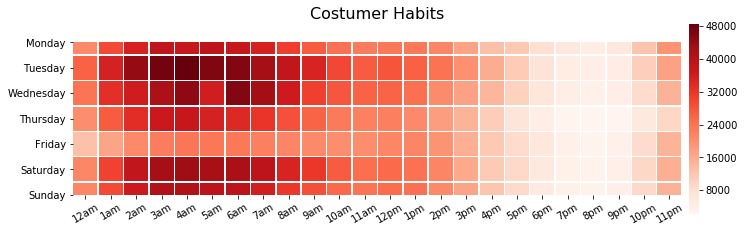

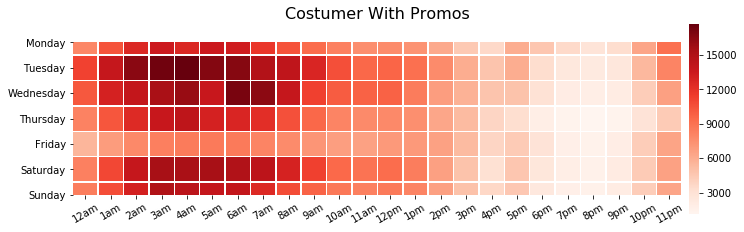

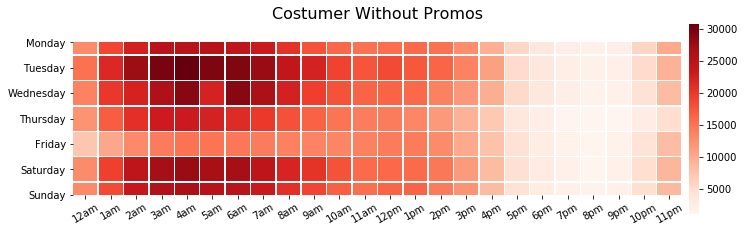

In [15]:
created_time_heatmap('Costumer Habits',habits_payment,'Reds', kind = 'created')
created_time_heatmap('Costumer with Promos',habits_payment[habits_payment['promo']==1],'Reds',kind = 'created')
created_time_heatmap('Costumer without Promos',habits_payment[habits_payment['promo']==0],'Reds',kind = 'created')

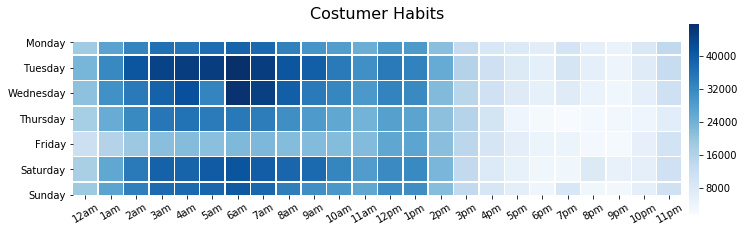

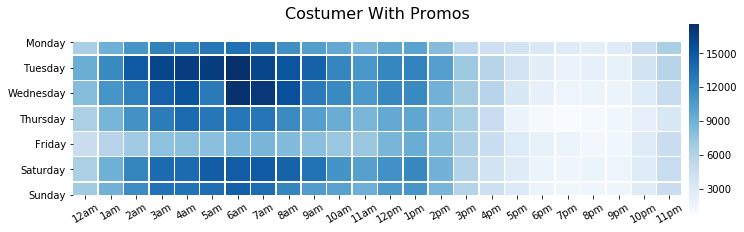

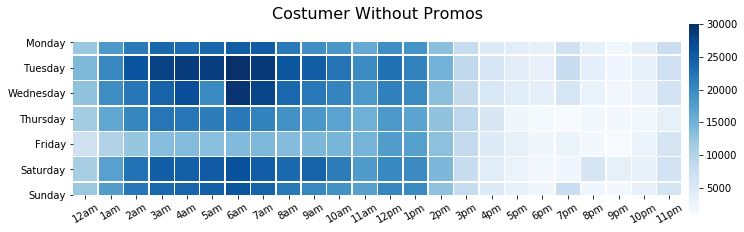

In [16]:
created_time_heatmap('Costumer Habits',habits_payment,'Blues', kind = 'paid')
created_time_heatmap('Costumer with Promos',habits_payment[habits_payment['promo']==1],'Blues',kind = 'paid')
created_time_heatmap('Costumer without Promos',habits_payment[habits_payment['promo']==0],'Blues',kind = 'paid')

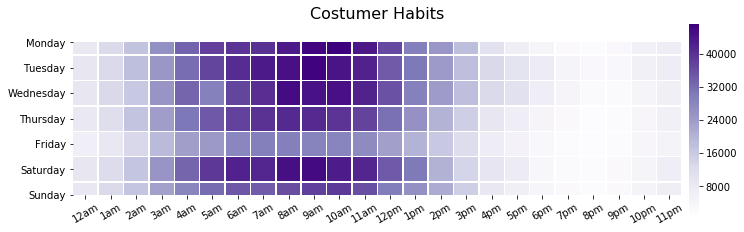

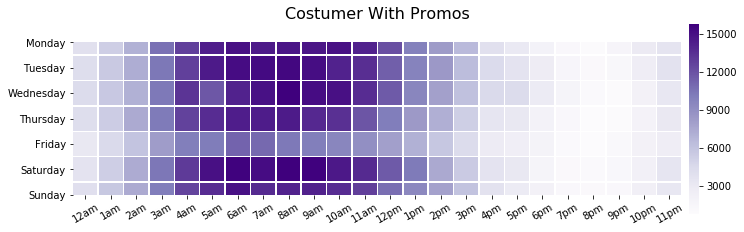

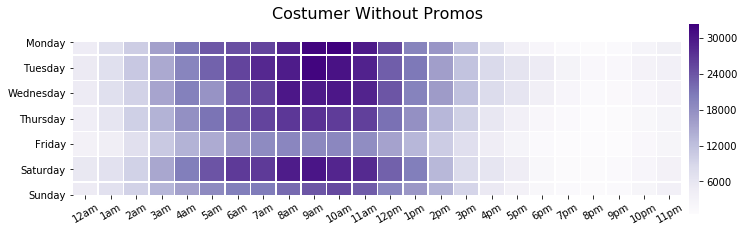

In [17]:
created_time_heatmap('Costumer Habits',habits_payment,'Purples', kind = 'remitted')
created_time_heatmap('Costumer with Promos',habits_payment[habits_payment['promo']==1],'Purples',kind = 'remitted')
created_time_heatmap('Costumer without Promos',habits_payment[habits_payment['promo']==0],'Purples',kind = 'remitted')

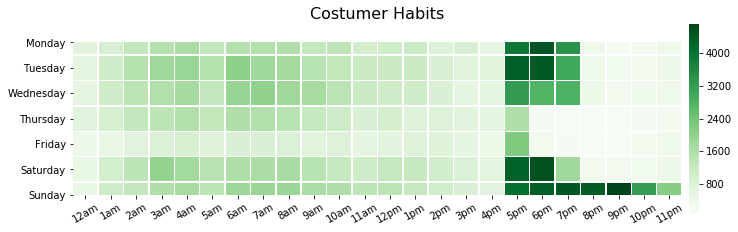

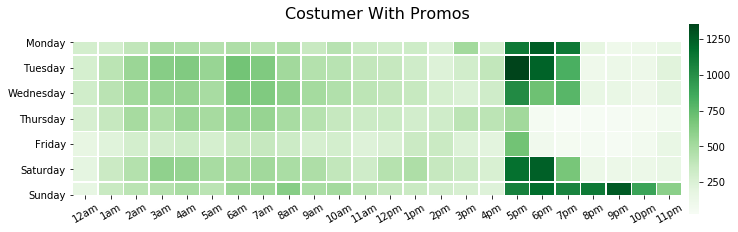

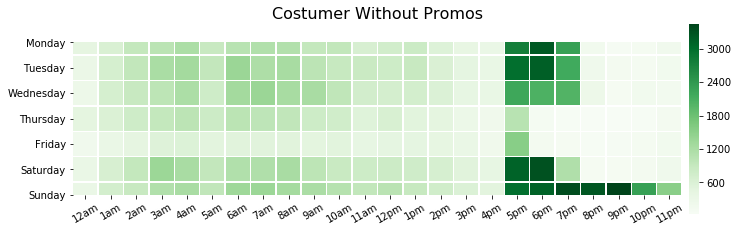

In [30]:
created_time_heatmap('Costumer Habits',habits_payment,'Greens', kind = 'refunded')
created_time_heatmap('Costumer with Promos',habits_payment[habits_payment['promo']==1],'Greens',kind = 'refunded')
created_time_heatmap('Costumer without Promos',habits_payment[habits_payment['promo']==0],'Greens',kind = 'refunded')

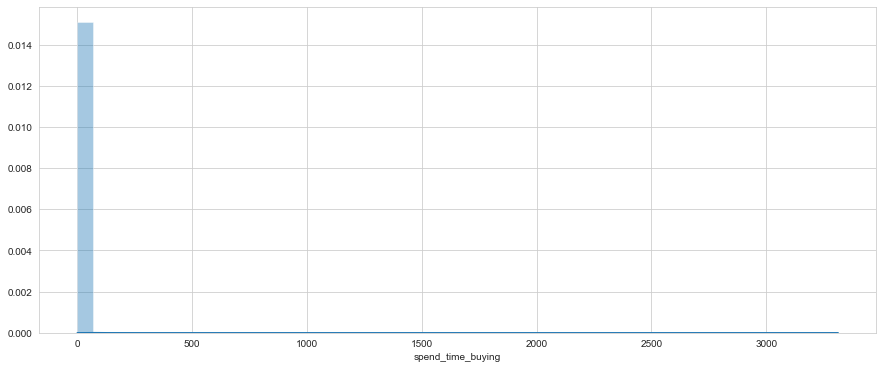

In [258]:
#melihat distribusi created ke paid
fig,ax=plt.subplots(figsize=(15,6))
sns.distplot(habits_payment['spend_time_buying'], kde_kws={'bw': 0.1})
plt.show()


# refunded

Text(0.5, 1.0, 'Payment')

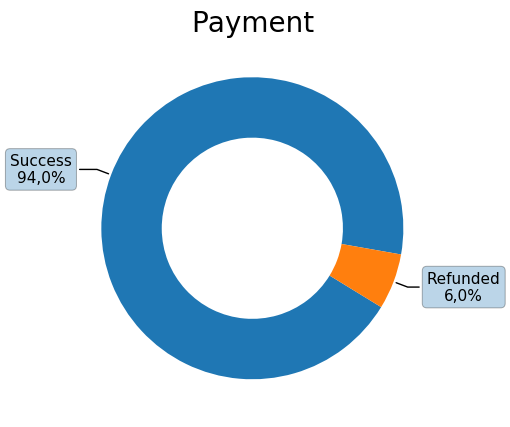

In [31]:
d = habits_payment[['refunded']].groupby('refunded').size().reset_index().rename(columns={0:'count'})
fig, ax = plt.subplots(figsize=(5,5), dpi=100)
wedges, texts = ax.pie(d['count'], wedgeprops=dict(width=0.4), startangle=-10)
for i, p in enumerate(wedges):
    bbox_props = dict(boxstyle="round,pad=0.3",  ec="k", lw=0.72, alpha=.3)
    kw = dict(xycoords='data', textcoords='data', arrowprops=dict(arrowstyle="-", color='k'),
              bbox=bbox_props, zorder=0, va="center")
    ang = (p.theta2 - p.theta1)/2 + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    connectionstyle = "angle, angleA=0, angleB={}".format(ang)
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    percent = 100*d['count'][i]/sum(d.sum())
    percs = '{:.1f}'.format(percent).replace('.',',')
    txt = 'Refunded'
    if d['refunded'][i] == 0:
        txt = 'Success'
    
    ax.annotate('{}\n{}%'.format(txt, percs), xy=(x, y), xytext=(1.4*np.sign(x), 1.1*y),
                 ha='center', fontsize=11, **kw)
    
title = 'Payment'
plt.title(title, fontsize=20, color='k')

In [10]:
buyer = pd.read_csv('../buyer_info.csv')

In [11]:
buyer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1286604 entries, 0 to 1286603
Data columns (total 13 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   id                 1286604 non-null  int64  
 1   email_domain       1286604 non-null  int64  
 2   gender             1286604 non-null  int64  
 3   category           1286604 non-null  int64  
 4   from_city          1286604 non-null  object 
 5   domisili_count     1286604 non-null  int64  
 6   count              1286604 non-null  int64  
 7   buying             1286604 non-null  int64  
 8   refunded           1286604 non-null  int64  
 9   spend_time_buying  1286604 non-null  float64
 10  gmv                1286604 non-null  float64
 11  promo              1286604 non-null  int64  
 12  Clusters           1286604 non-null  int64  
dtypes: float64(2), int64(10), object(1)
memory usage: 127.6+ MB


In [12]:
buyer_info = buyer[['id', 'email_domain', 'gender', 'category', 'from_city',
       'domisili_count', 'buying', 'refunded', 'spend_time_buying', 'Clusters']]

In [7]:
refunded = habits_payment[habits_payment['refunded']==1][['promo_type', 'promo_campaign', 'amount', 'buyer_id', 'seller_id',
       'gmv', 'courier_cost', 'payment_method', 'platform', 'courier',
       'weight', 'promo', 'refunded']].merge(buyer_info.rename(columns={'refunded':'total_refunded'}),left_on = 'buyer_id',right_on = 'id').drop('id',axis=1)
refunded[[ 'amount', 'gmv', 'courier_cost', 'domisili_count', 'buying', 'total_refunded', 'spend_time_buying']].describe()

NameError: name 'buyer_info' is not defined

In [13]:
success = habits_payment[habits_payment['refunded']==0][['promo_type', 'promo_campaign', 'amount', 'buyer_id', 'seller_id',
       'gmv', 'courier_cost', 'payment_method', 'platform', 'courier',
       'weight', 'promo', 'refunded']].merge(buyer_info.rename(columns={'refunded':'total_refunded'}),left_on = 'buyer_id',right_on = 'id').drop('id',axis=1)
success[[ 'amount', 'gmv', 'courier_cost', 'domisili_count', 'buying', 'total_refunded', 'spend_time_buying']].describe()

,amount,gmv,courier_cost,domisili_count,buying,total_refunded,spend_time_buying
count,1.315626e+06,3.347564e+06,3.347564e+06,3.347564e+06,3.347564e+06,3.347564e+06,3.347564e+06
mean,-1.838430e+00,-4.223485e-01,-2.748806e+00,4.167106e+00,1.242869e+01,6.198621e-01,1.286158e+00
std,4.250210e-01,1.172653e+00,1.848438e+00,4.027014e+00,4.055372e+01,1.871815e+00,3.370740e+00
min,-2.936000e+00,-7.540000e+00,-1.382000e+01,1.000000e+00,1.000000e+00,0.000000e+00,-1.388889e-03
25%,-1.836000e+00,-1.062500e+00,-3.040000e+00,1.000000e+00,2.000000e+00,0.000000e+00,5.847222e-02
50%,-1.836000e+00,-5.405000e-01,-2.598000e+00,3.000000e+00,5.000000e+00,0.000000e+00,3.826389e-01
75%,-1.836000e+00,1.003000e-01,-2.059000e+00,5.000000e+00,1.100000e+01,1.000000e+00,1.698125e+00
max,9.775000e-01,7.727000e+00,4.105000e+00,5.000000e+01,1.400000e+03,6.300000e+01,3.312407e+03


In [14]:
buyer_payment = habits_payment[['promo_type', 'promo_campaign', 'amount', 'buyer_id', 'seller_id',
       'gmv', 'courier_cost', 'payment_method', 'platform', 'courier',
       'weight', 'promo', 'refunded']].merge(buyer_info.rename(columns={'refunded':'total_refunded'}),left_on = 'buyer_id',right_on = 'id').drop('id',axis=1)

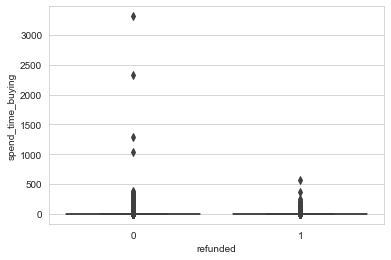

In [15]:
sns.set_style("whitegrid") 
sns.boxplot(y = 'spend_time_buying', x = 'refunded', data = buyer_payment); 

Text(0.5, 1.0, 'Promo')

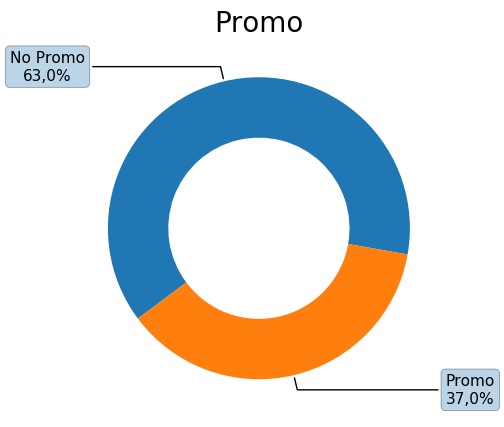

In [37]:
d = habits_payment[['promo']].groupby('promo').size().reset_index().rename(columns={0:'count'})
fig, ax = plt.subplots(figsize=(5,5), dpi=100)
wedges, texts = ax.pie(d['count'], wedgeprops=dict(width=0.4), startangle=-10)
for i, p in enumerate(wedges):
    bbox_props = dict(boxstyle="round,pad=0.3",  ec="k", lw=0.72, alpha=.3)
    kw = dict(xycoords='data', textcoords='data', arrowprops=dict(arrowstyle="-", color='k'),
              bbox=bbox_props, zorder=0, va="center")
    ang = (p.theta2 - p.theta1)/2 + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    connectionstyle = "angle, angleA=0, angleB={}".format(ang)
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    percent = 100*d['count'][i]/sum(d.sum())
    percs = '{:.1f}'.format(percent).replace('.',',')
    txt = 'Promo'
    if d['promo'][i] == 0:
        txt = 'No Promo'
    
    ax.annotate('{}\n{}%'.format(txt, percs), xy=(x, y), xytext=(1.4*np.sign(x), 1.1*y),
                 ha='center', fontsize=11, **kw)
    
title = 'Promo'
plt.title(title, fontsize=20, color='k')

Text(0.5, 1.0, 'Promo Type')

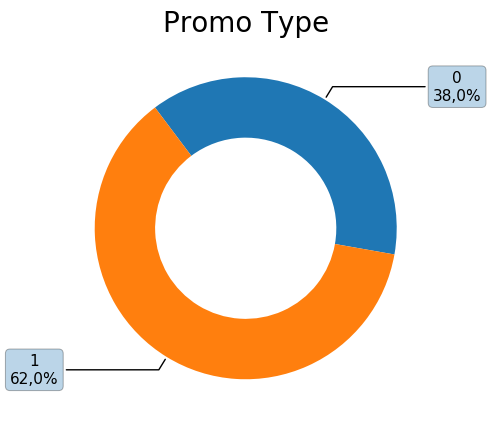

In [42]:
d = habits_payment[['promo_type']].groupby('promo_type').size().reset_index().rename(columns={0:'count'})
fig, ax = plt.subplots(figsize=(5,5), dpi=100)
wedges, texts = ax.pie(d['count'], wedgeprops=dict(width=0.4), startangle=-10)
for i, p in enumerate(wedges):
    bbox_props = dict(boxstyle="round,pad=0.3",  ec="k", lw=0.72, alpha=.3)
    kw = dict(xycoords='data', textcoords='data', arrowprops=dict(arrowstyle="-", color='k'),
              bbox=bbox_props, zorder=0, va="center")
    ang = (p.theta2 - p.theta1)/2 + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    connectionstyle = "angle, angleA=0, angleB={}".format(ang)
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    percent = 100*d['count'][i]/sum(d.sum())
    percs = '{:.1f}'.format(percent).replace('.',',')
    txt = '1'
    if d['promo_type'][i] == 0:
        txt = '0'
    
    ax.annotate('{}\n{}%'.format(txt, percs), xy=(x, y), xytext=(1.4*np.sign(x), 1.1*y),
                 ha='center', fontsize=11, **kw)
    
title = 'Promo Type'
plt.title(title, fontsize=20, color='k')

In [ ]:
def barchart(df, colors,kind, title = None):
#     data = df.groupby(kind).mean()[['Engagement']].sort_values('Engagement',ascending=True)
    data = df
    my_color = [list(matplotlib.colors.to_rgba(colors[i])) for i in data.index]
    fig,ax=plt.subplots(figsize=(6,5))
    data[['Engagement']].plot(kind='barh', width=.75, legend=False,ax=ax, color=[np.array(my_color)])
    ax.set_ylabel('')
    for i in ax.spines:
        ax.spines[i].set_visible(False)
    ax.set_xticks([])
    yloc = len(data)-1.07
    for value in list(data.sort_values('Engagement',ascending=False)['Engagement']):
        if value != 0:
            if value >= 1000:
                va = "  {:.3f}".format(value/1000)
            else:
                va = "  {:.2f}".format(value)

            xloc = value+0.01*value
            ax.annotate(s='{}'.format(str(va)), 
                        xy=(xloc,yloc), 
                        xycoords=('data', 'data'), 
                        color='k',size=11)
        yloc-=1
    plt.title(title, size=14)

In [81]:
d = habits_payment.groupby(['promo_type','promo_campaign']).size().sort_values(ascending=False).reset_index()
d['promos'] = d.apply(lambda s: 'promo type {} with campaign {}'.format(s['promo_type'],
                                                                        s['promo_campaign']),axis=1)
d = d.set_index('promos').rename(columns={0:'count'})

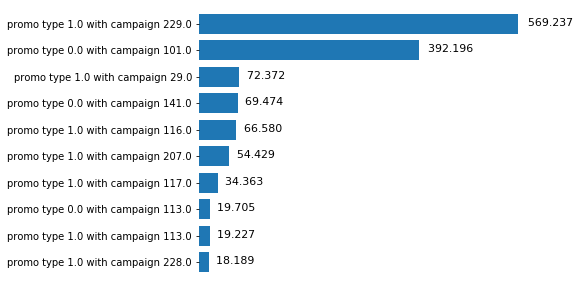

In [80]:
data = d[['count']][:10].sort_values('count',ascending=True)
fig,ax=plt.subplots(figsize=(6,5))
data.plot(kind='barh', width=.75, legend=False,ax=ax)
ax.set_ylabel('')
for i in ax.spines:
    ax.spines[i].set_visible(False)
ax.set_xticks([])
yloc = len(data)-1.07
for value in list(data.sort_values('count',ascending=False)['count']):
    if value != 0:
        if value >= 1000:
            va = "  {:.3f}".format(value/1000)
        else:
            va = "  {:.2f}".format(value)

        xloc = value+0.01*value

        ax.annotate(s='{}'.format(str(va)), 
                    xy=(xloc,yloc), 
                    xycoords=('data', 'data'), 
                    color='k',size=11)
    yloc-=1
plt.title('', size=14);

In [84]:
payment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3750623 entries, 0 to 3750622
Data columns (total 33 columns):
 #   Column                 Dtype          
---  ------                 -----          
 0   promo_id               float64        
 1   promo_type             float64        
 2   promo_campaign         float64        
 3   amount                 float64        
 4   buyer_id               int32          
 5   seller_id              int32          
 6   created_at             object         
 7   paid_at                object         
 8   remitted_at            object         
 9   refunded_at            datetime64[ns] 
 10  gmv                    float64        
 11  courier_cost           float64        
 12  payment_method         int64          
 13  platform               int16          
 14  courier                int16          
 15  from_city              int16          
 16  weight                 float64        
 17  created_day            object         
 18  cr

In [16]:
refund = payment[payment['refunded']==1][['paid_at']]
success = payment[payment['refunded']==0][['paid_at']]
refund['paid_at'] = pd.to_datetime(refund['paid_at'])
success['paid_at'] = pd.to_datetime(success['paid_at'])

In [18]:
types='D'
success = success.groupby(pd.Grouper(key='paid_at',freq=types)).size().reset_index()
refund = refund.groupby(pd.Grouper(key='paid_at',freq=types)).size().reset_index()

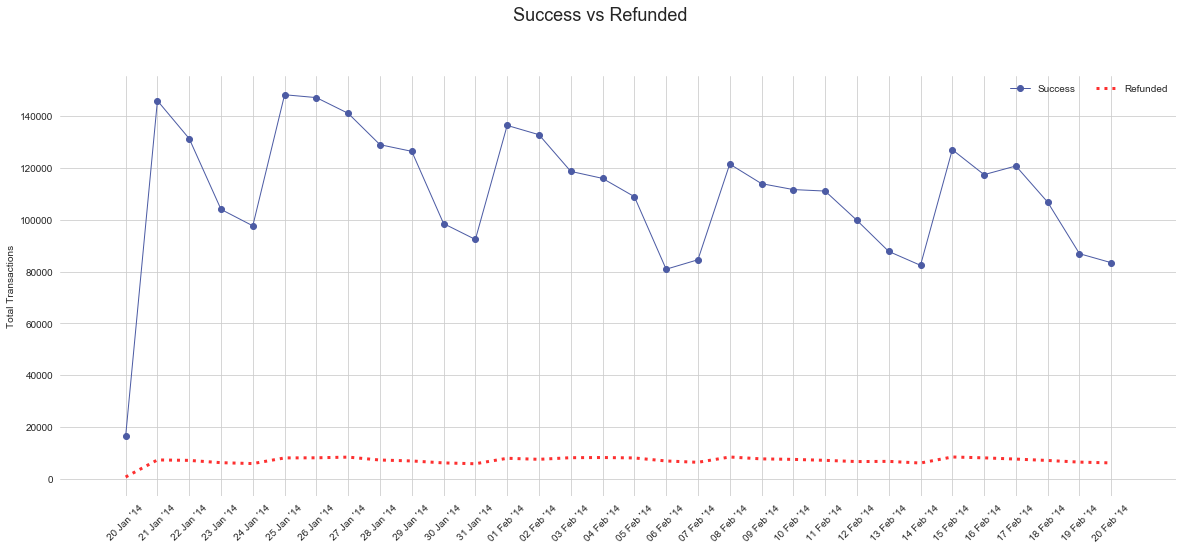

In [19]:
types = 'D'
title = 'Success vs Refunded'
label = success.reset_index()["paid_at"].apply(lambda x:datetime.datetime.strftime(x, "%d %b \'%y"))

fig,ax=plt.subplots(figsize=(20,8))

success.rename(columns={0:'Success'}).plot(kind="line", y='Success', ax=ax, linewidth=1, color="#4C5BA4", 
       marker='o')
refund.rename(columns={0:'Refunded'}).plot(kind='line', y='Refunded', ax=ax, linestyle=':', color='#FD3030', linewidth=3)

ax.set_xlabel('')
ax.set_ylabel('Total Transactions')
# ax.set_xticklabels(label,rotation = 45)
xticks_range = range(0,len(label),5)
plt.xticks(range(len(label)), label, rotation=45)
ax.tick_params(which='major',  axis='x', color='w')
# plt.setp(ax.get_xticklabels(), rotation=45, horizontalalignment='right')

plt.gcf().subplots_adjust(bottom=0.15)
for loc in ['top','left','bottom','right']:
    ax.spines[loc].set_color('dimgrey')

xlim = ax.get_xlim()
ax.set_xlim([xlim[0]-0.5,xlim[1]+0.5])

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

ax.legend( ncol=2, frameon=False)
plt.suptitle(title, size=18, y=1);

In [20]:
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error


In [21]:
def plot_ts(ts, plot_ma=True, plot_intervals=True, window=30,
            figsize=(15,5)):    
    rolling_mean = ts.rolling(window=window).mean()    
    rolling_std = ts.rolling(window=window).std()
    plt.figure(figsize=figsize)    
    plt.title(ts.name)    
    plt.plot(ts[window:], label='Actual values', color="black")    
    if plot_ma:        
      plt.plot(rolling_mean, 'g', label='MA'+str(window),
               color="red")    
    if plot_intervals:
      lower_bound = rolling_mean - (1.96 * rolling_std)
      upper_bound = rolling_mean + (1.96 * rolling_std)
    plt.fill_between(x=ts.index, y1=lower_bound, y2=upper_bound,
                    color='lightskyblue', alpha=0.4)
    plt.legend(loc='best')
    plt.show()

In [31]:
refund1 = payment[payment['refunded']==1][['paid_at']]
success1 = payment[payment['refunded']==0][['paid_at']]
refund1['paid_at'] = pd.to_datetime(refund1['paid_at'])
success1['paid_at'] = pd.to_datetime(success1['paid_at'])

In [68]:
types = 'H'
success = success1.groupby(pd.Grouper(key='paid_at',freq=types)).size().reset_index()

success = success.rename(columns={0:'Transactions'})
success = success.set_index('paid_at')
refund = refund1.groupby(pd.Grouper(key='paid_at',freq=types)).size().reset_index()

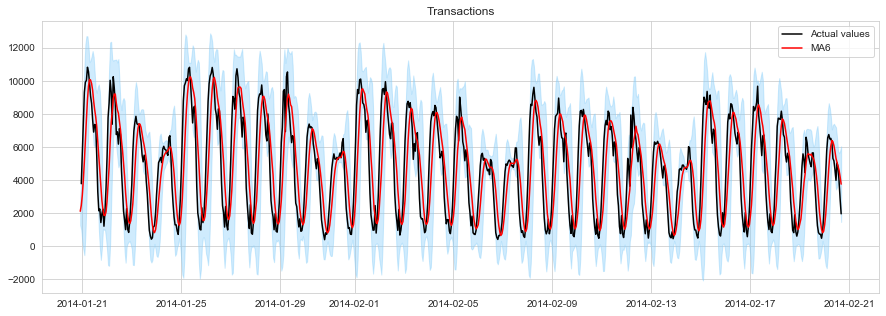

In [73]:
ts = success['Transactions']
plot_ts(ts,window=6)

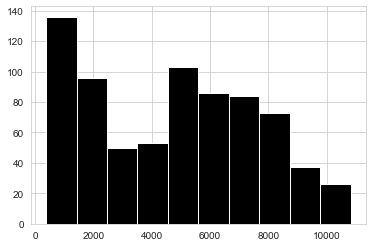

In [74]:
ts.hist(color="black", bins=10);

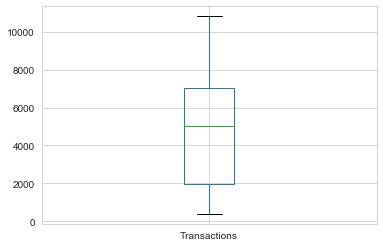

In [75]:
ts.plot.box()

In [40]:
from sklearn import preprocessing, svm
import statsmodels.tsa.api as smt
import statsmodels.api as sm
def test_stationarity_acf_pacf(ts, sample=0.20, maxlag=30, figsize= 
                              (15,10)):
    with plt.style.context(style='bmh'):
        ## set figure
        fig = plt.figure(figsize=figsize)
        ts_ax = plt.subplot2grid(shape=(2,2), loc=(0,0), colspan=2)
        pacf_ax = plt.subplot2grid(shape=(2,2), loc=(1,0))
        acf_ax = plt.subplot2grid(shape=(2,2), loc=(1,1))
        
        ## plot ts with mean/std of a sample from the first x% 
        dtf_ts = ts.to_frame(name="ts")
        sample_size = int(len(ts)*sample)
        dtf_ts["mean"] = dtf_ts["ts"].head(sample_size).mean()
        dtf_ts["lower"] = dtf_ts["ts"].head(sample_size).mean() + dtf_ts["ts"].head(sample_size).std()
        dtf_ts["upper"] = dtf_ts["ts"].head(sample_size).mean() - dtf_ts["ts"].head(sample_size).std()
        dtf_ts["ts"].plot(ax=ts_ax, color="black", legend=False)
        dtf_ts["mean"].plot(ax=ts_ax, legend=False, color="red",
                            linestyle="--", linewidth=0.7)
        ts_ax.fill_between(x=dtf_ts.index, y1=dtf_ts['lower'], 
                y2=dtf_ts['upper'], color='lightskyblue', alpha=0.4)
        dtf_ts["mean"].head(sample_size).plot(ax=ts_ax,
                legend=False, color="red", linewidth=0.9)
        ts_ax.fill_between(x=dtf_ts.head(sample_size).index, 
                           y1=dtf_ts['lower'].head(sample_size), 
                           y2=dtf_ts['upper'].head(sample_size),
                           color='lightskyblue')
        
        ## test stationarity (Augmented Dickey-Fuller)
        adfuller_test = sm.tsa.stattools.adfuller(ts, maxlag=maxlag,
                                                  autolag="AIC")
        adf, p, critical_value = adfuller_test[0], adfuller_test[1], adfuller_test[4]["5%"]
        p = round(p, 3)
        conclusion = "Stationary" if p < 0.05 else "Non-Stationary"
        ts_ax.set_title('Dickey-Fuller Test 95%: '+conclusion+
                        '(p value: '+str(p)+')')
        
        ## pacf (for AR) e acf (for MA) 
        smt.graphics.plot_pacf(ts, lags=maxlag, ax=pacf_ax, 
                 title="Partial Autocorrelation (for AR component)")
        smt.graphics.plot_acf(ts, lags=maxlag, ax=acf_ax,
                 title="Autocorrelation (for MA component)")
        plt.tight_layout()

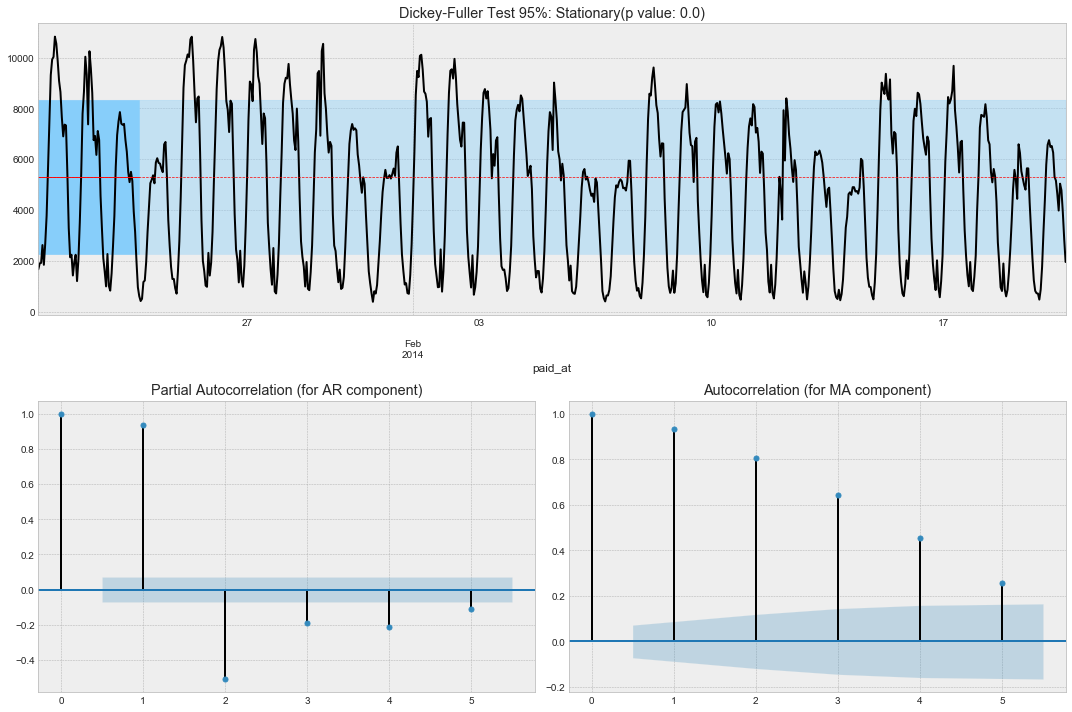

In [76]:
test_stationarity_acf_pacf(ts, sample=0.10, maxlag=5)

C:\Users\955498\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  


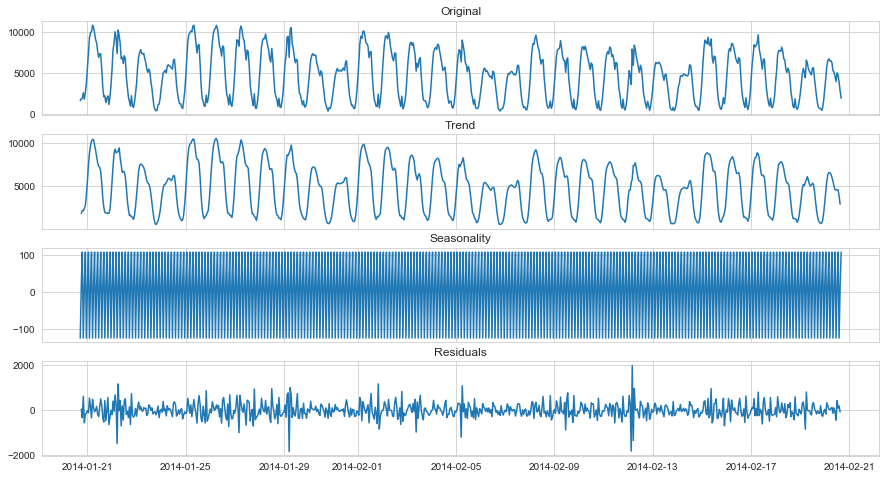

In [77]:
#test sesional
decomposition = smt.seasonal_decompose(ts, freq=3)
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid   
fig, ax = plt.subplots(nrows=4, ncols=1,figsize=(15,8), sharex=True, sharey=False)
ax[0].plot(ts)
ax[0].set_title('Original')
ax[0].grid(True) 
ax[1].plot(trend)
ax[1].set_title('Trend')
ax[1].grid(True)  
ax[2].plot(seasonal)
ax[2].set_title('Seasonality')
ax[2].grid(True)  
ax[3].plot(residual)
ax[3].set_title('Residuals')
ax[3].grid(True)

In [46]:
def split_train_test(ts, test=0.20, plot=True, figsize=(15,5)):
    ## define splitting point
    if type(test) is float:
        split = int(len(ts)*(1-test))
        perc = test
    elif type(test) is str:
        split = ts.reset_index()[ 
                      ts.reset_index().iloc[:,0]==test].index[0]
        perc = round(len(ts[split:])/len(ts), 2)
    else:
        split = test
        perc = round(len(ts[split:])/len(ts), 2)
    print("--- splitting at index: ", split, "|", 
          ts.index[split], "| test size:", perc, " ---")
    
    ## split ts
    ts_train = ts.head(split)
    ts_test = ts.tail(len(ts)-split)
    if plot is True:
        fig, ax = plt.subplots(nrows=1, ncols=2, sharex=False, 
                               sharey=True, figsize=figsize)
        ts_train.plot(ax=ax[0], grid=True, title="Train", 
                      color="black")
        ts_test.plot(ax=ax[1], grid=True, title="Test", 
                     color="black")
        ax[0].set(xlabel=None)
        ax[1].set(xlabel=None)
        plt.show()
        
    return ts_train, ts_test

--- splitting at index:  535 | 2014-02-12 00:00:00 | test size: 0.28  ---


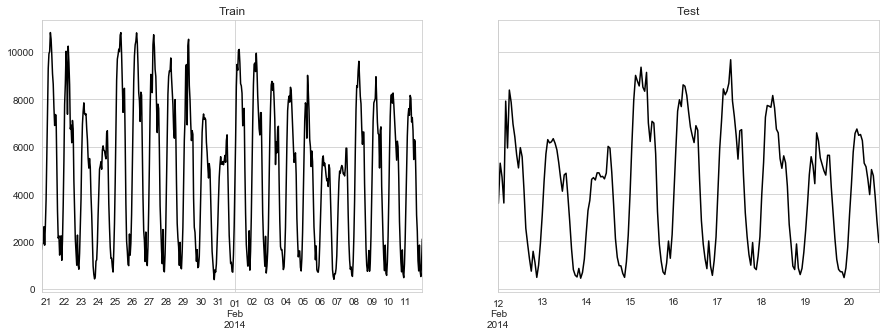

In [78]:
ts_train, ts_test = split_train_test(ts, test="2014-02-12")

In [52]:

def utils_evaluate_forecast(dtf, title, plot=True, figsize=(20,13)):
    try:
        ## residuals
        dtf["residuals"] = dtf["ts"] - dtf["model"]
        dtf["error"] = dtf["ts"] - dtf["forecast"]
        dtf["error_pct"] = dtf["error"] / dtf["ts"]
        
        ## kpi
        residuals_mean = dtf["residuals"].mean()
        residuals_std = dtf["residuals"].std()
        error_mean = dtf["error"].mean()
        error_std = dtf["error"].std()
        mae = dtf["error"].apply(lambda x: np.abs(x)).mean()
        mape = dtf["error_pct"].apply(lambda x: np.abs(x)).mean()  
        mse = dtf["error"].apply(lambda x: x**2).mean()
        rmse = np.sqrt(mse)  #root mean squared error
        
        ## intervals
        dtf["conf_int_low"] = dtf["forecast"] - 1.96*residuals_std
        dtf["conf_int_up"] = dtf["forecast"] + 1.96*residuals_std
        dtf["pred_int_low"] = dtf["forecast"] - 1.96*error_std
        dtf["pred_int_up"] = dtf["forecast"] + 1.96*error_std
        
        ## plot
        if plot==True:
            fig = plt.figure(figsize=figsize)
            fig.suptitle(title, fontsize=20)   
            ax1 = fig.add_subplot(2,2, 1)
            ax2 = fig.add_subplot(2,2, 2, sharey=ax1)
            ax3 = fig.add_subplot(2,2, 3)
            ax4 = fig.add_subplot(2,2, 4)
            ### training
            dtf[pd.notnull(dtf["model"])][["ts","model"]].plot(color=["black","green"], title="Model", grid=True, ax=ax1)      
            ax1.set(xlabel=None)
            ### test
            dtf[pd.isnull(dtf["model"])][["ts","forecast"]].plot(color=["black","red"], title="Forecast", grid=True, ax=ax2)
            ax2.fill_between(x=dtf.index, y1=dtf['pred_int_low'], y2=dtf['pred_int_up'], color='b', alpha=0.2)
            ax2.fill_between(x=dtf.index, y1=dtf['conf_int_low'], y2=dtf['conf_int_up'], color='b', alpha=0.3)     
            ax2.set(xlabel=None)
            ### residuals
            dtf[["residuals","error"]].plot(ax=ax3, color=["green","red"], title="Residuals", grid=True)
            ax3.set(xlabel=None)
            ### residuals distribution
            dtf[["residuals","error"]].plot(ax=ax4, color=["green","red"], kind='kde', title="Residuals Distribution", grid=True)
            ax4.set(ylabel=None)
            plt.show()
            print("Training --> Residuals mean:", np.round(residuals_mean), " | std:", np.round(residuals_std))
            print("Test --> Error mean:", np.round(error_mean), " | std:", np.round(error_std),
                  " | mae:",np.round(mae), " | mape:",np.round(mape*100), "%  | mse:",np.round(mse), " | rmse:",np.round(rmse))
        
        return dtf[["ts","model","residuals","conf_int_low","conf_int_up", 
                    "forecast","error","pred_int_low","pred_int_up"]]
    
    except Exception as e:
        print("--- got error ---")
        print(e)

In [66]:
def fit_sarimax(ts_train, ts_test, order=(1,0,1), 
                seasonal_order=(0,0,0,0), exog_train=None, 
                exog_test=None, figsize=(15,10)):
    ## train
    model = smt.SARIMAX(ts_train, order=order, 
                        seasonal_order=seasonal_order, 
                        exog=exog_train, enforce_stationarity=False, 
                        enforce_invertibility=False).fit()
    dtf_train = ts_train.to_frame(name="ts")
    dtf_train["model"] = model.fittedvalues
    
    ## test
    dtf_test = ts_test.to_frame(name="ts")
    dtf_test["forecast"] = model.predict(start=len(ts_train), 
                            end=len(ts_train)+len(ts_test)-1, 
                            exog=exog_test)
    
    ## evaluate
    dtf = dtf_train.append(dtf_test)
    title = "ARIMA "+str(order) if exog_train is None else "ARIMAX "+str(order)
    title = "S"+title+" x "+str(seasonal_order) if np.sum(seasonal_order) > 0 else title
    dtf = utils_evaluate_forecast(dtf, figsize=figsize, title=title)
    return dtf, model

In [ ]:
import pmdarima
best_model = pmdarima.auto_arima(ts,                                    
                                 seasonal=True, stationary=False, 
                                 m=7, max_p=10, max_d=3, max_q=10,                                     
                                 max_P=10, max_D=3, max_Q=10,                                   
                                 error_action='ignore')
print("best model --> (p, d, q):", best_model.order, " and  (P, D, Q, s):", best_model.seasonal_order)

C:\Users\955498\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:963: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\955498\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:975: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\955498\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\955498\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\955498\AppData\R

C:\Users\955498\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\955498\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\955498\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\955498\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\955498\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: Con

MemoryError: Unable to allocate 27.1 MiB for an array with shape (69, 69, 745) and data type float64

In [49]:

import pmdarima
best_model = pmdarima.auto_arima(ts, m=7, max_p=10, max_d=3, max_q=10,                                     
                             max_P=10, max_D=3, max_Q=10, 
                             start_P=2, seasonal=True,
                             stationary=False,
                             trace=True,
                             error_action='ignore',
                             suppress_warnings=True,
                             stepwise=True)
print("best model --> (p, d, q):", best_model.order, " and  (P, D, Q, s):", best_model.seasonal_order)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(2,1,1)[7] intercept   : AIC=inf, Time=2.06 sec
 ARIMA(0,0,0)(0,1,0)[7] intercept   : AIC=585.577, Time=0.02 sec
 ARIMA(1,0,0)(1,1,0)[7] intercept   : AIC=567.597, Time=0.48 sec
 ARIMA(0,0,1)(0,1,1)[7] intercept   : AIC=577.530, Time=0.40 sec
 ARIMA(0,0,0)(0,1,0)[7]             : AIC=584.639, Time=0.01 sec
 ARIMA(1,0,0)(0,1,0)[7] intercept   : AIC=572.030, Time=0.17 sec
 ARIMA(1,0,0)(2,1,0)[7] intercept   : AIC=568.491, Time=0.64 sec
 ARIMA(1,0,0)(1,1,1)[7] intercept   : AIC=625.908, Time=0.20 sec
 ARIMA(1,0,0)(0,1,1)[7] intercept   : AIC=568.321, Time=0.60 sec
 ARIMA(1,0,0)(2,1,1)[7] intercept   : AIC=inf, Time=1.05 sec
 ARIMA(0,0,0)(1,1,0)[7] intercept   : AIC=587.199, Time=0.06 sec
 ARIMA(2,0,0)(1,1,0)[7] intercept   : AIC=567.293, Time=0.56 sec
 ARIMA(2,0,0)(0,1,0)[7] intercept   : AIC=573.616, Time=0.38 sec
 ARIMA(2,0,0)(2,1,0)[7] intercept   : AIC=567.298, Time=0.90 sec
 ARIMA(2,0,0)(1,1,1)[7] intercept   : AIC=567.778, Time

C:\Users\955498\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\955498\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\955498\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:868: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  ' zeros.' % warning_description)


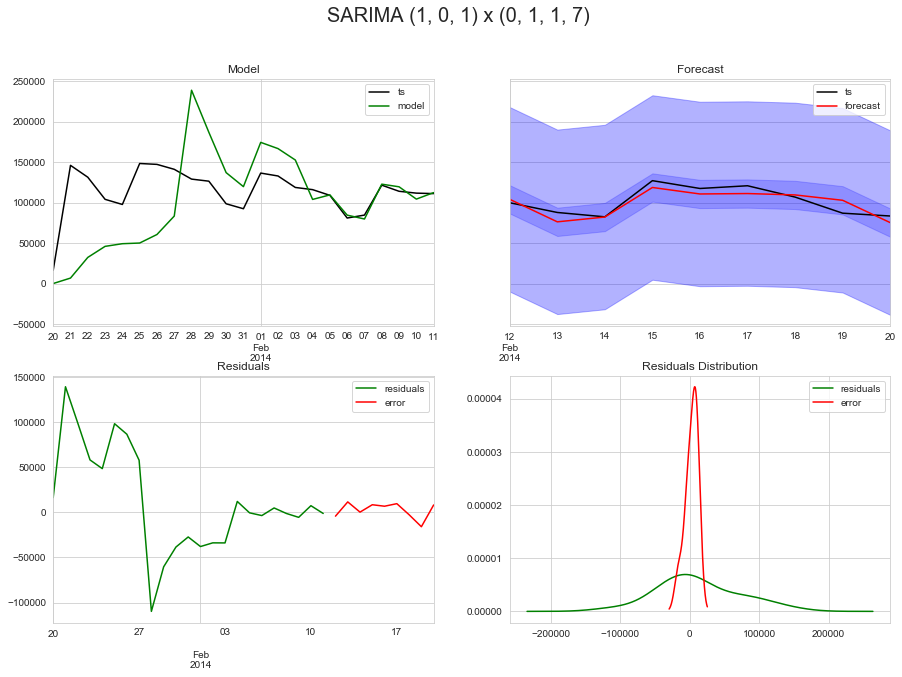

Training --> Residuals mean: 11933.0  | std: 58126.0
Test --> Error mean: 2446.0  | std: 8912.0  | mae: 7518.0  | mape: 8.0 %  | mse: 76589488.0  | rmse: 8752.0


In [67]:
dtf, model = fit_sarimax(ts_train, ts_test, order=best_model.order, 
                         seasonal_order= best_model.seasonal_order)

In [62]:
def utils_generate_indexdate(start, end=None, n=None, freq="D"):
    if end is not None:
        index = pd.date_range(start=start, end=end, freq=freq)
    else:
        index = pd.date_range(start=start, periods=n, freq=freq)
    index = index[1:]
    print("--- generating index date --> start:", index[0], 
          "| end:", index[-1], "| len:", len(index), "---")
    return index

In [63]:

def utils_plot_forecast(dtf, zoom=30, figsize=(15,5)):
    ## interval
    dtf["residuals"] = dtf["ts"] - dtf["model"]
    dtf["conf_int_low"] = dtf["forecast"] - 1.96*dtf["residuals"].std()
    dtf["conf_int_up"] = dtf["forecast"] + 1.96*dtf["residuals"].std()
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=figsize)
    
    ## entire series
    dtf[["ts","forecast"]].plot(color=["black","red"], grid=True, ax=ax[0], title="History + Future")
    ax[0].fill_between(x=dtf.index, y1=dtf['conf_int_low'], y2=dtf['conf_int_up'], color='b', alpha=0.3) 
          
    ## focus on last
    first_idx = dtf[pd.notnull(dtf["forecast"])].index[0]
    first_loc = dtf.index.tolist().index(first_idx)
    zoom_idx = dtf.index[first_loc-zoom]
    dtf.loc[zoom_idx:][["ts","forecast"]].plot(color=["black","red"], grid=True, ax=ax[1], title="Zoom on the last "+str(zoom)+" observations")
    ax[1].fill_between(x=dtf.loc[zoom_idx:].index, y1=dtf.loc[zoom_idx:]['conf_int_low'], 
                       y2=dtf.loc[zoom_idx:]['conf_int_up'], color='b', alpha=0.3)
    plt.show()
    return dtf[["ts","model","residuals","conf_int_low","forecast","conf_int_up"]]

In [64]:
def forecast_arima(ts, model, pred_ahead=None, end=None, freq="D", zoom=30, figsize=(15,5)):
    ## fit
    model = model.fit()
    dtf = ts.to_frame(name="ts")
    dtf["model"] = model.fittedvalues
    dtf["residuals"] = dtf["ts"] - dtf["model"]
    
    ## index
    index = utils_generate_indexdate(start=ts.index[-1], end=end, n=pred_ahead, freq=freq)
    
    ## forecast
    preds = model.forecast(len(index))
    dtf = dtf.append(preds.to_frame(name="forecast"))
    
    ## plot
    dtf = utils_plot_forecast(dtf, zoom=zoom)
    return dtf


C:\Users\955498\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\955498\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\955498\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:1006: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
C:\Users\955498\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


--- generating index date --> start: 2014-02-21 00:00:00 | end: 2014-03-01 00:00:00 | len: 9 ---


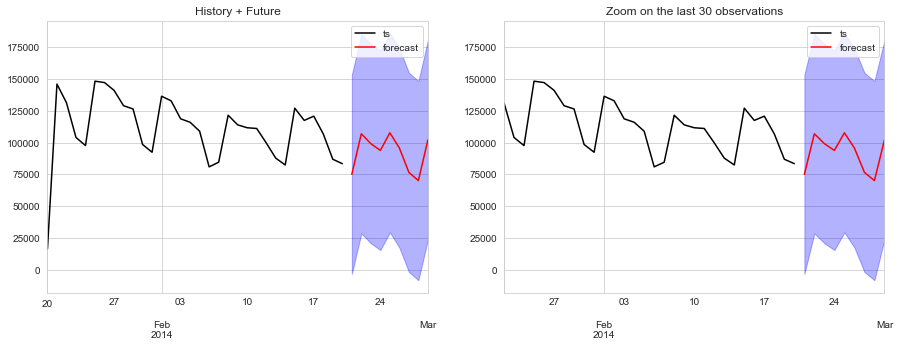

In [65]:
model = smt.SARIMAX(ts, order=(1,0,1), seasonal_order=(0,1,1,7))
future = forecast_arima(ts, model, end="2014-03-01", zoom=30)

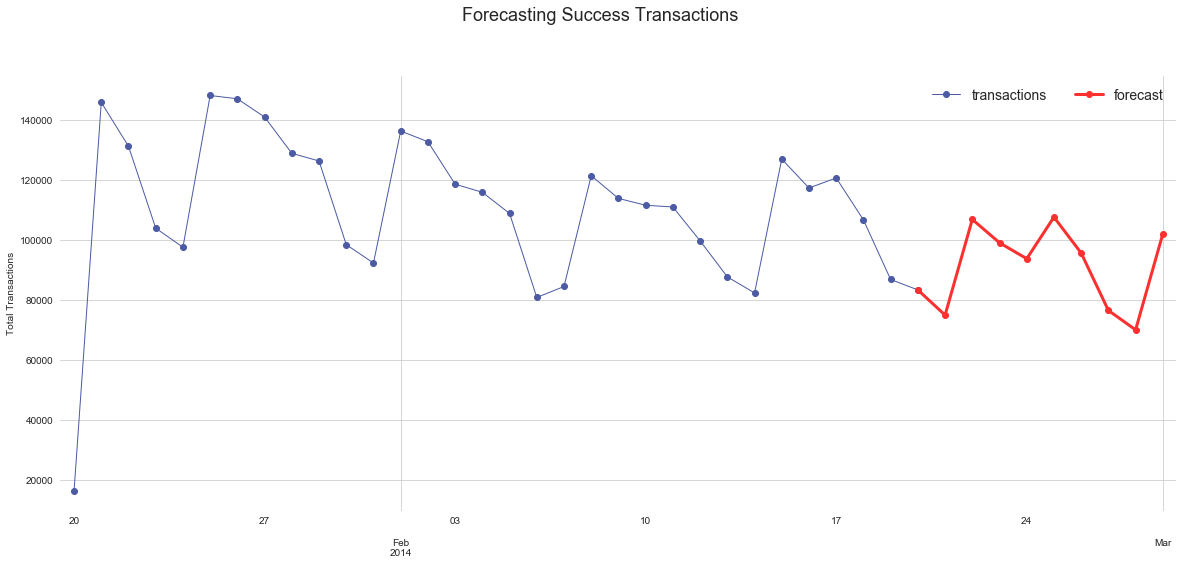

In [402]:
fig,ax=plt.subplots(figsize=(20,8))
label = future.reset_index()["index"].apply(lambda x:datetime.datetime.strftime(x, "%d %b \'%y"))
future.rename(columns={'ts':'transactions'}).plot(kind="line", y='transactions', ax=ax, linewidth=1, color="#4C5BA4", 
       marker='o')
future.plot(kind='line', y='forecast', ax=ax, marker = 'o', color='#FD3030', linewidth=3)

ax.set_xlabel('')
ax.set_ylabel('Total Transactions')
# xticks_range = range(0,len(label),5)
# plt.xticks(range(len(label)), label, rotation=45)
ax.tick_params(which='major',  axis='x', color='w')
# plt.setp(ax.get_xticklabels(), rotation=45, horizontalalignment='right')

# plt.gcf().subplots_adjust(bottom=0.15)
for loc in ['top','left','bottom','right']:
    ax.spines[loc].set_color('dimgrey')

xlim = ax.get_xlim()
ax.set_xlim([xlim[0]-0.5,xlim[1]+0.5])

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

ax.legend( ncol=2, frameon=False,prop={'size': 14})
plt.suptitle('Forecasting Success Transactions', size=18, y=1);

In [403]:
future

,ts,model,residuals,conf_int_low,forecast,conf_int_up
2014-01-20,16389.0,0.000000,16389.000000,NaN,NaN,NaN
2014-01-21,145971.0,4890.710022,141080.289978,NaN,NaN,NaN
2014-01-22,131319.0,38950.867354,92368.132646,NaN,NaN,NaN
2014-01-23,104004.0,53596.524580,50407.475420,NaN,NaN,NaN
2014-01-24,97650.0,55006.650557,42643.349443,NaN,NaN,NaN
2014-01-25,148266.0,52992.682257,95273.317743,NaN,NaN,NaN
2014-01-26,147161.0,61722.116549,85438.883451,NaN,NaN,NaN
2014-01-27,141078.0,97262.895887,43815.104113,NaN,NaN,NaN
2014-01-28,128980.0,165399.830804,-36419.830804,NaN,NaN,NaN
2014-01-29,126415.0,137299.364866,-10884.364866,NaN,NaN,NaN


# costumer vs courier distribution

In [126]:
city_courier = payment.groupby(['from_city'])['courier'].unique().reset_index()

In [127]:
city_courier['count_courier'] = city_courier['courier'].transform(len)

In [128]:
city_buyer = payment.groupby(['from_city'])['buyer_id'].unique().reset_index()

In [129]:
city_buyer['count_buyer'] = city_buyer['buyer_id'].transform(len)

In [130]:
df_city = city_buyer.merge(city_courier,on='from_city')
df_city['buyer_per_courier'] = df_city['count_buyer']/df_city['count_courier']

In [131]:
df_city.head(2)

,from_city,buyer_id,count_buyer,courier,count_courier,buyer_per_courier
0,0,"[34402433, 12852091, 3826912, 35842108, 453124...",93,"[10, 11, 17, 16]",4,23.25
1,1,"[3647188, 65656646, 61123660, 35675183, 374476...",71,"[17, 11, 10, 13, 16]",5,14.20


In [132]:
#data peta indonesia untuk kebutuhan visualisasi
prov = pd.read_csv('D:\\script\\data lokasi\\provinsi.csv')
kotakab = pd.read_csv('D:\\script\\data lokasi\\kotakab.csv')

In [133]:
kotakab.head(2)

,name,kotakab,code_kotakab,code_provinsi,name_kotakab
0,KAB.ACEHSELATAN,KAB. ACEH SELATAN,1101,11,KAB.ACEHSELATAN
1,KAB.ACEHTENGGARA,KAB. ACEH TENGGARA,1102,11,KAB.ACEHTENGGARA


In [134]:
dict_prov = prov.merge(kotakab,on='code_provinsi')[['provinsi','kotakab']].to_dict()['provinsi']

In [135]:
#asumsi bahwa setiap kategori di kolom from_city adalah kode kota, dan diambil segmentasi per provinsinya 
#(mengikuti index)
df_city['provinsi'] = df_city['from_city'].transform(lambda s: dict_prov[s])

In [136]:
df_city.to_csv('city_buyer_per_courier.csv',index=False)

# order_brushing

filter hanya order yang tidak refunded

In [142]:
order_analysis = payment[payment['refunded']==0][['trx_id','buyer_id','seller_id','paid_at']]

In [143]:
order_analysis.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3526792 entries, 0 to 3750622
Data columns (total 4 columns):
 #   Column     Dtype 
---  ------     ----- 
 0   trx_id     int32 
 1   buyer_id   int32 
 2   seller_id  int32 
 3   paid_at    object
dtypes: int32(3), object(1)
memory usage: 94.2+ MB


In [144]:
order_analysis['paid_at'] = pd.to_datetime(order_analysis['paid_at'])
order_analysis['date'] = order_analysis['paid_at'].dt.strftime('%Y-%m-%d %H')

In [145]:
df_group_day = order_analysis.groupby(['seller_id','buyer_id','date']).count()[['trx_id']]

In [146]:
df_group_day['trx_id'].describe()

count    3.398266e+06
mean     1.037821e+00
std      2.558657e-01
min      1.000000e+00
25%      1.000000e+00
50%      1.000000e+00
75%      1.000000e+00
max      2.500000e+01
Name: trx_id, dtype: float64

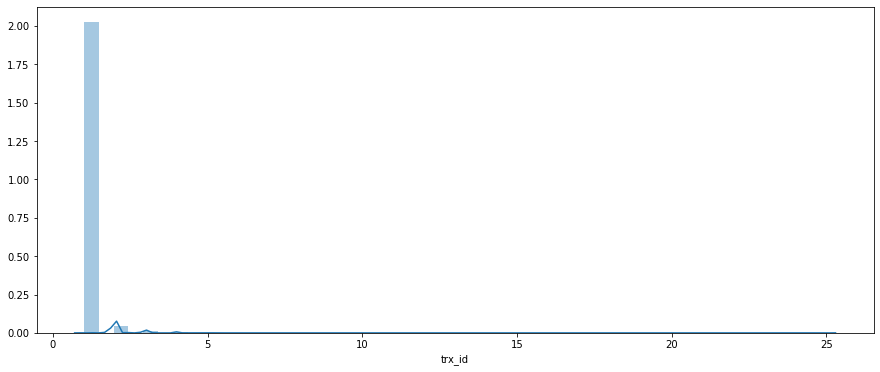

In [153]:
#melihat distribusi jumlah order
fig,ax=plt.subplots(figsize=(15,6))
sns.distplot(df_group_day['trx_id'], kde_kws={'bw': 0.1})
plt.show()


In [154]:
print("Mean: %f" % df_group_day['trx_id'].mean())
print("Std: %f" % df_group_day['trx_id'].std())
print("Skewness: %f" % df_group_day['trx_id'].skew())
print("Kurtosis: %f" % df_group_day['trx_id'].kurt())

Mean: 1.037821
Std: 0.255866
Skewness: 10.329118
Kurtosis: 188.231818


The Order distribution is far from a normal distribution, and it has a positive long thin tail, the mass of the distribution is concentrated on the left of the figure. And the tail sales distribution far exceeds the tails of the normal distribution.
There are one region where the data has low probability to appear which is on the right side of the distribution.

In [155]:
#threshold untuk order yang dianggap brushing
border = df_group_day['trx_id'].mean() + 3*df_group_day['trx_id'].std()

In [156]:
border

1.8054180242100673

In [178]:
#seller yang melakukan brushing
brushing = df_group_day[df_group_day['trx_id']>round(border)].reset_index()
brushing.head()

,seller_id,buyer_id,date,trx_id
0,-1,2048971,2014-01-25 08,4
1,-1,5432404,2014-01-28 00,3
2,-1,11801649,2014-02-17 20,3
3,2180,24778085,2014-02-20 04,3
4,7313,65960246,2014-01-23 16,3


In [171]:
print('jumlah seller brushing {} dengan jumlah buyer {} dan {} transaksi'.format(brushing.seller_id.unique().shape[0],
                                                                                brushing.buyer_id.unique().shape[0],
                                                                                brushing.trx_id.sum()))

jumlah seller brushing 18473 dengan jumlah buyer 40865 dan 224678 transaksi


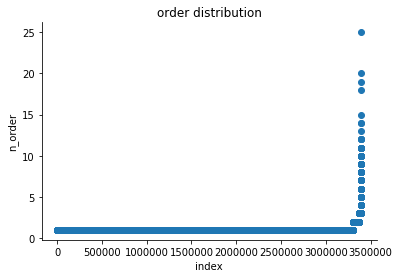

In [159]:
plt.scatter(range(df_group_day.shape[0]), np.sort(df_group_day['trx_id'].values))
plt.xlabel('index')
plt.ylabel('n_order')
plt.title("order distribution")
sns.despine()

# is refunded impact from brushing?

In [179]:
#find seller brushing
seller_brushing = brushing.seller_id.unique()
print('terdapat %d seller yang teridentifikasi melakukan brushing'%len(seller_brushing))

terdapat 4668 seller yang teridentifikasi melakukan brushing


In [180]:
refunded_brush = refunded[refunded['seller_id'].isin(seller_brushing)]

In [182]:
t = refunded_brush.shape[0]/refunded.shape[0]*100
print('{:.1f}% refunded karena seller teridentifikasi melakukan brushing'.format(t))

11.7% refunded karena seller teridentifikasi melakukan brushing


In [184]:
print('terdapat {:.2f}% seller teridentifikasi melakukan brushing di cluster transaksi refunded'\
      .format(len(refunded_brush.seller_id.unique())/len(refunded.seller_id.unique())*100))

terdapat 3.46% seller teridentifikasi melakukan brushing di cluster transaksi refunded


# apakah refund karena salah memilih barang/klik barang

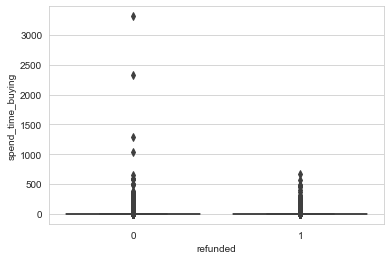

In [213]:
sns.set_style("whitegrid") 
sns.boxplot(y = 'spend_time_buying', x = 'refunded', data = payment); 

transaksi yang sukses memiliki rentang spend time buying yang lebih besar dibanding refunded

# apakah karena lambat pengantaran?

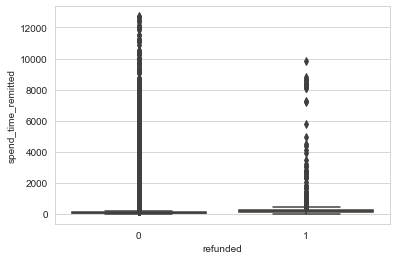

In [206]:
sns.set_style("whitegrid") 
sns.boxplot(y = 'spend_time_remitted', x = 'refunded', data = payment); 

# di tempat padat penduduk?

In [243]:
demography = payment[['seller_id','buyer_id','promo','refunded','trx_id','from_city',
                      'spend_time_buying','spend_time_remitted','courier']]

In [251]:
demography['from_city'] = demography['from_city'].transform(lambda s: dict_prov[s])

C:\Users\955498\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [232]:
def barchart(d, title=None):
    data = d[['count']][:10].sort_values('count',ascending=True)
    fig,ax=plt.subplots(figsize=(6,5))
    data.plot(kind='barh', width=.75, legend=False,ax=ax)
    ax.set_ylabel('')
    for i in ax.spines:
        ax.spines[i].set_visible(False)
    ax.set_xticks([])
    yloc = len(data)-1.07
    for value in list(data.sort_values('count',ascending=False)['count']):
        if value != 0:
            if value >= 1000:
                va = "  {:.3f}".format(value/1000)
            else:
                va = "  {:.2f}".format(value)

            xloc = value+0.01*value

            ax.annotate(s='{}'.format(str(va)), 
                        xy=(xloc,yloc), 
                        xycoords=('data', 'data'), 
                        color='k',size=11)
        yloc-=1
    if title:
        plt.title(title, size=14);

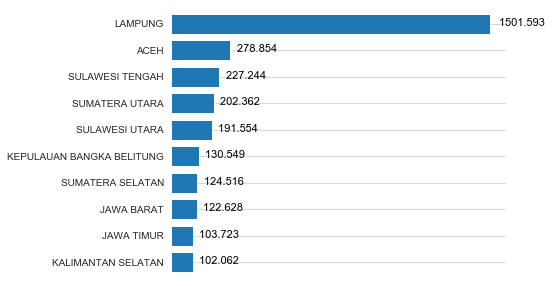

In [231]:
d = demography[demography['refunded']==0].groupby('from_city').size().sort_values(ascending=False).to_frame().rename(columns={0:'count'})
barchart(d)

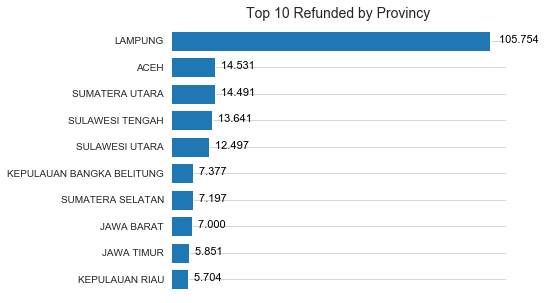

In [233]:
d = demography[demography['refunded']==1].groupby('from_city').size().sort_values(ascending=False).to_frame().rename(columns={0:'count'})
barchart(d,'Top 10 Refunded by Provincy')

# is cause promo?

Text(0.5, 1.0, 'Proportion Promos Refunded')

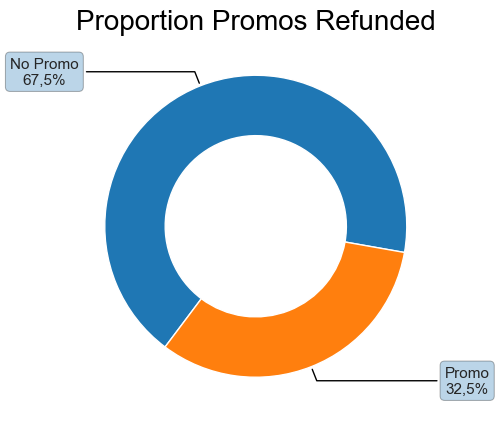

In [239]:
d = demography[demography['refunded']==1].groupby('promo').size().reset_index().rename(columns={0:'count'})
fig, ax = plt.subplots(figsize=(5,5), dpi=100)
wedges, texts = ax.pie(d['count'], wedgeprops=dict(width=0.4), startangle=-10)
for i, p in enumerate(wedges):
    bbox_props = dict(boxstyle="round,pad=0.3",  ec="k", lw=0.72, alpha=.3)
    kw = dict(xycoords='data', textcoords='data', arrowprops=dict(arrowstyle="-", color='k'),
              bbox=bbox_props, zorder=0, va="center")
    ang = (p.theta2 - p.theta1)/2 + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    connectionstyle = "angle, angleA=0, angleB={}".format(ang)
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    percent = 100*d['count'][i]/sum(d.sum())
    percs = '{:.1f}'.format(percent).replace('.',',')
    txt = 'Promo'
    if d['promo'][i] == 0:
        txt = 'No Promo'
    
    ax.annotate('{}\n{}%'.format(txt, percs), xy=(x, y), xytext=(1.4*np.sign(x), 1.1*y),
                 ha='center', fontsize=11, **kw)
    
title = 'Proportion Promos Refunded'
plt.title(title, fontsize=20, color='k')

# is cause courier?

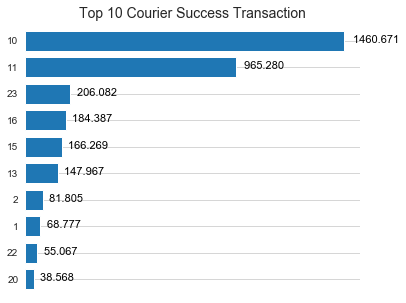

In [247]:
d = demography[demography['refunded']==0].groupby('courier').size().sort_values(ascending=False).to_frame().rename(columns={0:'count'})
barchart(d,'Top 10 Courier Success Transaction')

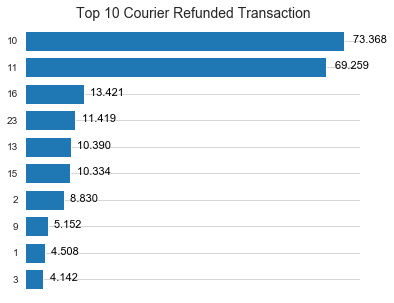

In [246]:
d = demography[demography['refunded']==1].groupby('courier').size().sort_values(ascending=False).to_frame().rename(columns={0:'count'})
barchart(d,'Top 10 Courier Refunded Transaction')

# time?

In [253]:
habits_payment.head(2)

,promo_type,promo_campaign,amount,buyer_id,seller_id,gmv,courier_cost,payment_method,platform,courier,...,created_day,created_hour,paid_day,paid_hour,remitted_day,remitted_hour,refunded_day,refunded_hour,spend_time_remitted,spend_time_buying
0,1.0,229.0,-1.836,66679816,8358318,-0.2266,-3.852,17,2,22,...,Wednesday,8,Wednesday,8,Sunday,3.0,NaT,NaT,90.689167,0.007500
1,0.0,101.0,-2.242,34214363,3595840,0.2842,-2.146,10,2,10,...,Wednesday,14,Wednesday,14,Saturday,8.0,NaT,NaT,66.310833,0.163611


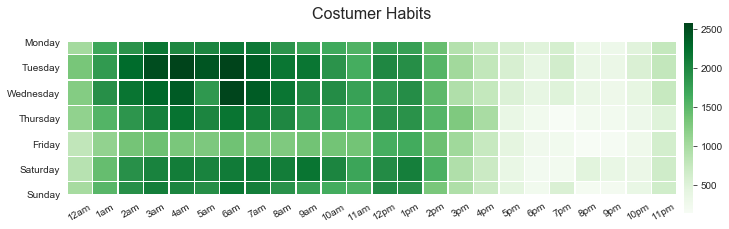

In [255]:
created_time_heatmap('Costumer Habits',habits_payment[habits_payment['refunded']==1],'Greens', kind = 'paid')

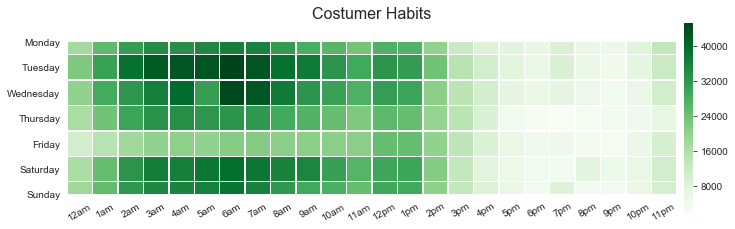

In [256]:
created_time_heatmap('Costumer Habits',habits_payment[habits_payment['refunded']==0],'Greens', kind = 'paid')